<a href="https://colab.research.google.com/github/kavdoot/CODSOFT_intern/blob/main/irisclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing depedencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load the Dataset
iris = load_iris()
X = iris.data
y = iris.target



In [4]:
# Convert to DataFrame for better visualization
iris_df = pd.DataFrame(data=np.c_[X, y], columns=iris['feature_names'] + ['target'])

# Display the first few rows
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [5]:
# Data Exploration
print(iris_df.describe())
print(iris_df.isnull().sum())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
pet

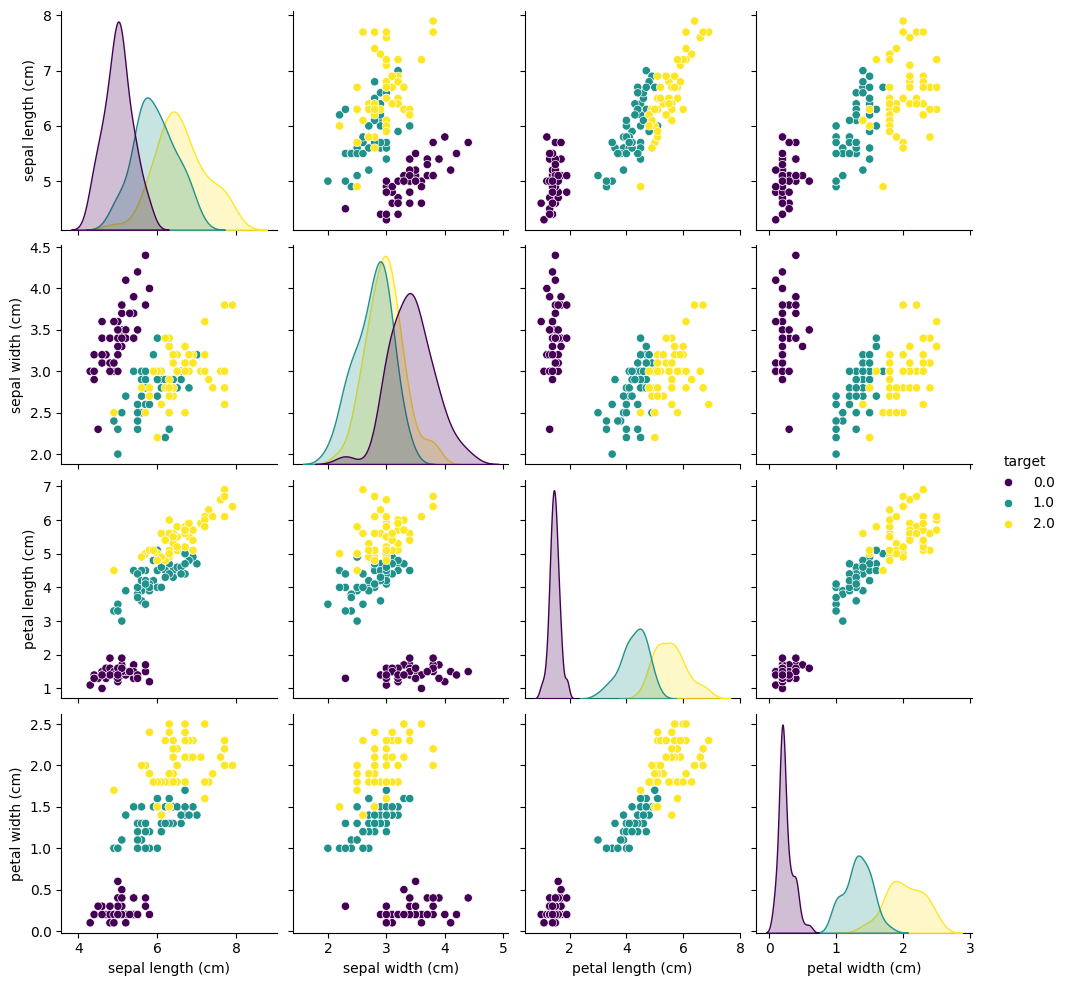

In [6]:
sns.pairplot(iris_df, hue='target', palette='viridis')
plt.show()

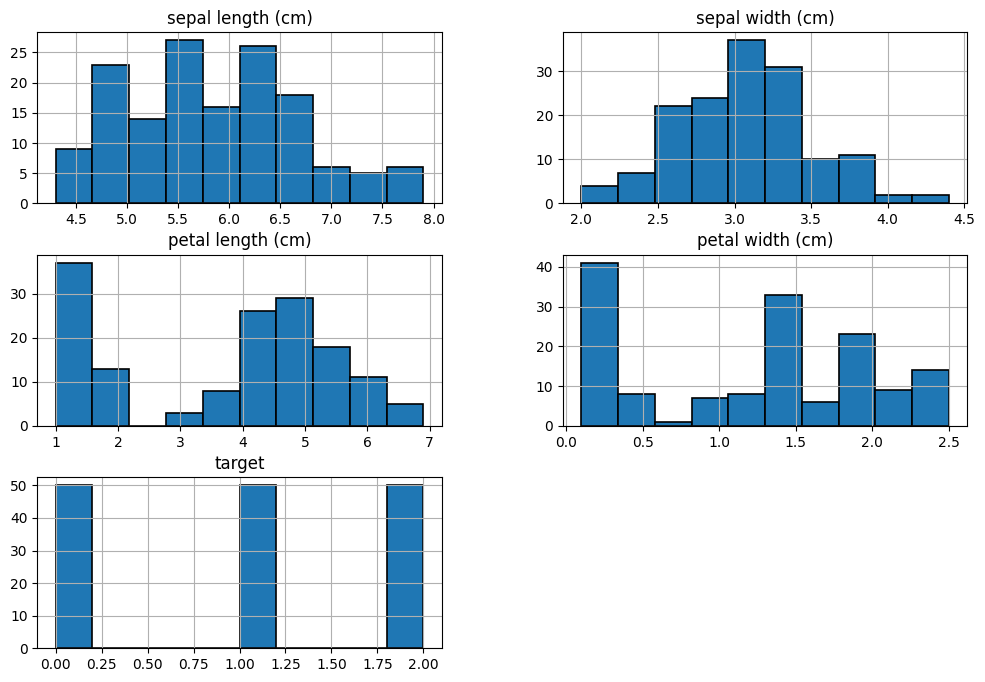

In [7]:
iris_df.hist(edgecolor='black', linewidth=1.2, figsize=(12, 8))
plt.show()

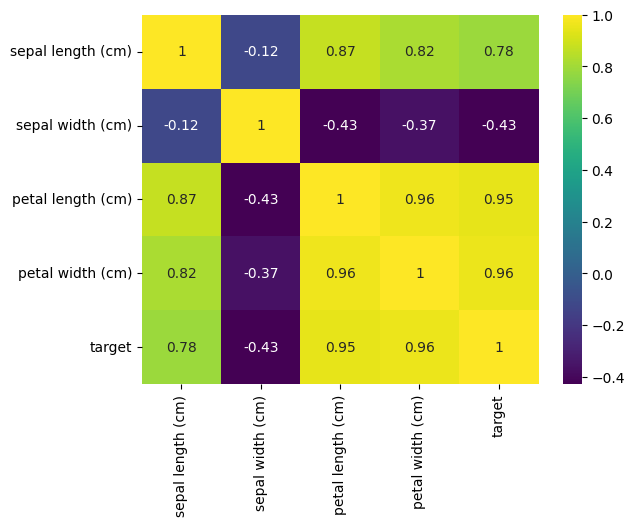

In [8]:
corr_matrix = iris_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()


In [9]:
# Preprocess the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy:.2f}')

KNN Accuracy: 0.93


In [11]:
print('KNN Classification Report:')
print(classification_report(y_test, y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [12]:
print('KNN Classification Report:')
print(classification_report(y_test, y_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



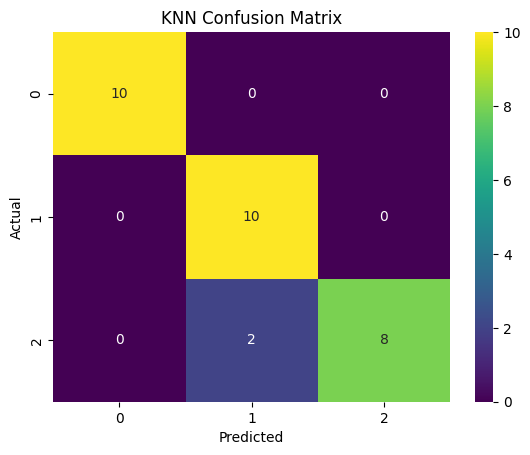

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# Cross-validation for initial model assessment
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print(f'KNN Cross-validation scores: {cv_scores}')
print(f'KNN Cross-validation mean score: {cv_scores.mean():.2f}')


KNN Cross-validation scores: [0.91666667 1.         0.91666667 0.95833333 1.        ]
KNN Cross-validation mean score: 0.96


SVM Accuracy: 0.97
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



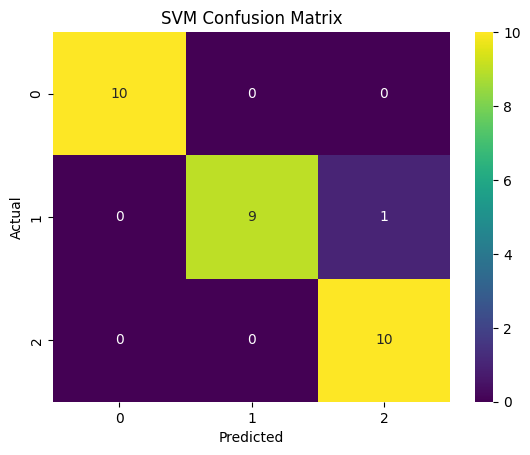

Decision Tree Accuracy: 0.93
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



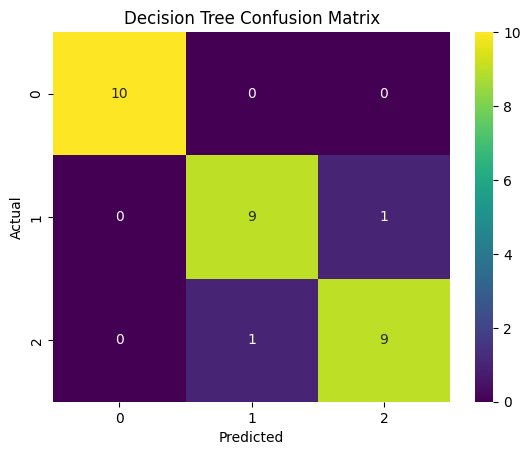

Random Forest Accuracy: 0.93
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



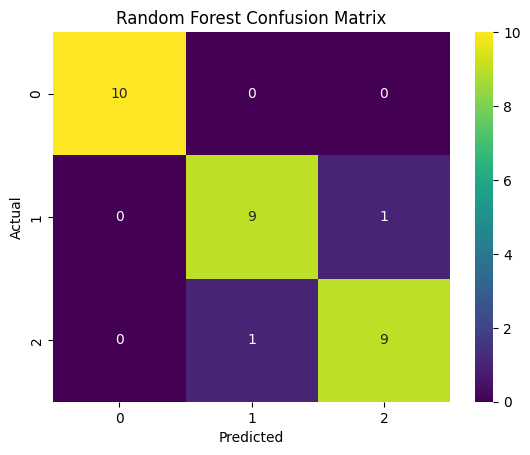

In [18]:

# Compare with other classifiers
classifiers = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict(X_test)
    accuracy_clf = accuracy_score(y_test, y_pred_clf)
    print(f'{name} Accuracy: {accuracy_clf:.2f}')
    print(f'{name} Classification Report:')
    print(classification_report(y_test, y_pred_clf))

    conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)
    sns.heatmap(conf_matrix_clf, annot=True, fmt='d', cmap='viridis')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()